## Nivell1
### Exercici 1
***Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica.***
* Agafem la dataframe de jugadors de a Nba i extraiem una mostra simple
* Com a atribut agafem l'alçada dels jugadors
* Farem servir el modul stadístic ja que en exercicis anteriors ja varem calcular manualment algunes variables estadístiques. Podriem fer funcions per calcular cada variable estadistica , pero les faré per ala mitjana geomètrica i la harmònica



In [1]:
#Importem les llibreries i veiem diferents propietats
import pandas as pd
import math

In [2]:
# llegim fitxer de dades
nbaPlayersDf=pd.read_csv('all_seasons.csv',index_col=False,sep=',', encoding='utf8')

In [3]:
# definim la funció per extreure una mostra simple , feta a l'exercici anteior
def creaMostraSimple(poblacioDF,mostraSize,inici): 
    final=len(poblacioDF.index)
    columnas=poblacioDF.columns
    mostraSimple=pd.DataFrame(columns=columnas) 
    rndPos = random.randint(inici, final) 
    for x in range(mostraSize): # iterem pel valor de la mostra
        #controlem repeticions
        while poblacioDF.iloc[rndPos]['num_fila'] in mostraSimple['num_fila']:
            #si ja hi és tornem a generar un altre npmbre aleatori
            #print(poblacioDF.iloc[rndPos]['num_fila'])
            rndPos = random.randint(inici, final)
            #print("random1:"+str(rndPos))
        mostraSimple=mostraSimple.append(poblacioDF.iloc[rndPos])
    
    return mostraSimple 

In [4]:
nbaPlayersDf.rename(columns={'Unnamed: 0':'num_fila'},inplace=True)


In [5]:
numRows=len(nbaPlayersDf.index)
# Demanem el tamany del mostreig en % del total
dimensioPct=float(input("Entra el percentatge de la mostra de "+str(numRows)+ " : "))
dimensio=int(numRows*dimensioPct/100)
print ("La dimensió de la mistra serà de :" + str(dimensio))


Entra el percentatge de la mostra de 11700 : 20
La dimensió de la mistra serà de :2340


In [6]:
mostraNbaDf=creaMostraSimple(nbaPlayersDf,dimensio,0)

In [100]:
mostraNbaDf.describe()

,age,player_height,player_weight,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000,2340.000000
mean,27.142308,200.857000,100.451890,8.299017,3.551709,1.825128,-1.722949,0.055104,0.140771,0.186286,0.511635,0.129993
std,4.308021,9.086924,12.378602,6.042822,2.455591,1.774442,10.758337,0.046135,0.059145,0.052414,0.094831,0.091319
min,18.000000,160.020000,60.327736,0.000000,0.000000,0.000000,-100.200000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,195.580000,90.718400,3.775000,1.800000,0.600000,-6.000000,0.022000,0.097000,0.150000,0.481000,0.067000
50%,27.000000,203.200000,99.790240,6.700000,3.000000,1.300000,-1.100000,0.042000,0.133000,0.183000,0.525000,0.102000
75%,30.000000,208.280000,108.862080,11.625000,4.600000,2.500000,3.300000,0.084000,0.178000,0.219000,0.558000,0.179000
max,41.000000,228.600000,147.417400,34.300000,16.100000,11.500000,150.000000,1.000000,0.444000,0.595000,1.025000,0.480000


In [28]:
#Importem modul stadistic
import statistics as st

In [72]:
# Per fer servir una funcio que rep una llista i retorna un un diccionari amb
# les variables estadisticas demanades
def varStatist(mostraDf):
    statisId=["Mitja","Mediana","Moda","Desv. Std: "]
    statisVal=[round(st.mean(mostraDf),2),round(st.median(mostraDf),2),round(st.mode(mostraDf),2),round(st.stdev(mostraDf),2)]
    statDict=dict(zip(statisId,statisVal))
    return statDict

In [73]:
print ("Les dades estdistiques del atribut ALÇADA de la mostra de \n els jugadors de la nba son:")
print(varStatist(mostraNbaDf['player_height']))

Les dades estdistiques del atribut ALÇADA de la mostra de 
 els jugadors de la nba son:
{'Mitja': 200.86, 'Mediana': 203.2, 'Moda': 205.74, 'Desv. Std: ': 9.09}


### Exercici 2
***Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació.***
* Seleccionem els atributs d'alçada i assistencies per partit per veure com es correlacionen 
 

In [74]:
#fem servir la llibreria numpy per fer servir la formula de la correlacio
import numpy as np


In [75]:
mostraNbaDf.corr().loc['player_height','ast']

-0.4752646472508192

* Conclusió:

    ***Es una correlació negativa , es a dir a mes alçada menys asistencies***
    
    ***Ho podem visualitzar ràpidament en un scatter plot***

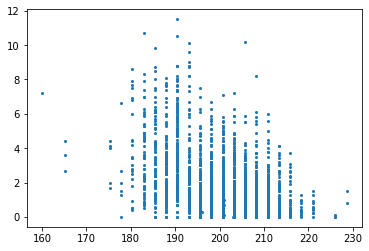

In [76]:
import matplotlib.pyplot as plt


plt.scatter(mostraNbaDf['player_height'], mostraNbaDf['ast'],s=4)

 ## Nivell2
### Exercici 3
***Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.***
* Farem servir el mètode .corr del la llibreria pandas per trobar totes les correlacions
* Posteriorment generem un mapa de calor amb la funcio sns.heatmap de la llibreria seaborn 


In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [78]:
columns=mostraNbaDf.columns


In [79]:
columns

Index(['num_fila', 'player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [80]:
mostraNbaSliceDf=mostraNbaDf.reindex(columns=['team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'])

In [81]:
mostraNbaCorr=mostraNbaSliceDf.corr(method="pearson")

In [82]:
mostraNbaCorr

,age,player_height,player_weight,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
age,1.000000,-0.020873,0.031495,-0.015032,0.014193,0.092921,0.094556,-0.061988,-0.008180,-0.152538,0.030024,0.070294
player_height,-0.020873,1.000000,0.822668,-0.091756,0.393468,-0.475265,0.001393,0.545041,0.647614,-0.122767,0.060742,-0.636555
player_weight,0.031495,0.822668,1.000000,-0.052226,0.418095,-0.408019,0.008011,0.575095,0.638893,-0.076134,0.057218,-0.567625
pts,-0.015032,-0.091756,-0.052226,1.000000,0.614351,0.659241,0.219934,-0.150894,0.027238,0.665974,0.380602,0.365401
reb,0.014193,0.393468,0.418095,0.614351,1.000000,0.237026,0.190551,0.358313,0.626805,0.240751,0.293226,-0.049261
ast,0.092921,-0.475265,-0.408019,0.659241,0.237026,1.000000,0.171499,-0.344082,-0.228410,0.396961,0.191132,0.836090
net_rating,0.094556,0.001393,0.008011,0.219934,0.190551,0.171499,1.000000,0.084027,0.070922,0.040244,0.192259,0.079190
oreb_pct,-0.061988,0.545041,0.575095,-0.150894,0.358313,-0.344082,0.084027,1.000000,0.591349,-0.102141,-0.011644,-0.422428
dreb_pct,-0.008180,0.647614,0.638893,0.027238,0.626805,-0.228410,0.070922,0.591349,1.000000,-0.028990,0.067153,-0.349591
usg_pct,-0.152538,-0.122767,-0.076134,0.665974,0.240751,0.396961,0.040244,-0.102141,-0.028990,1.000000,0.133961,0.353404


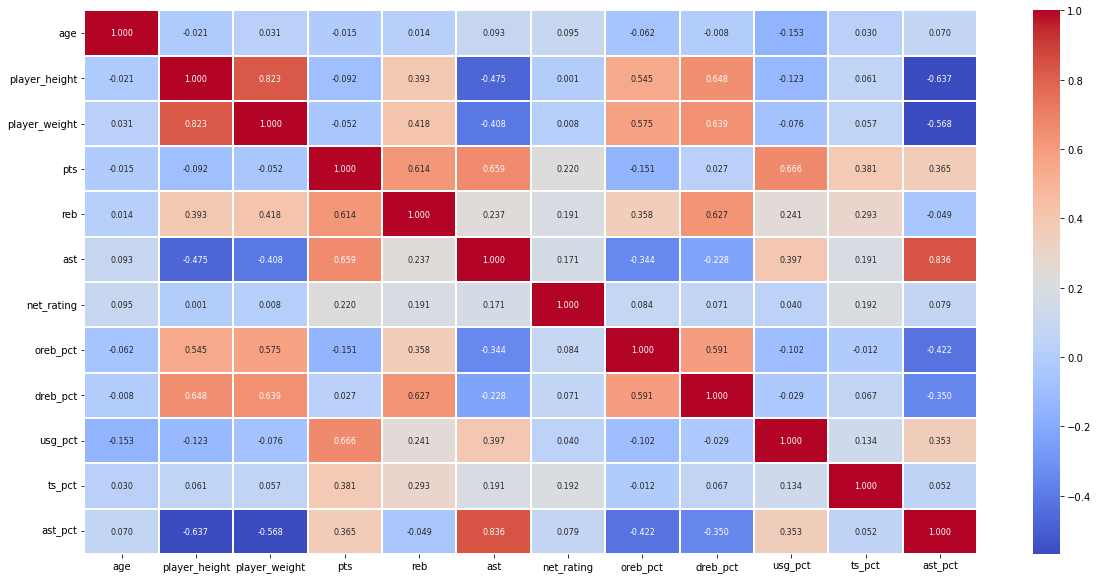

In [85]:
#Configurem el el grafic seaborn perque mostri la correlació dins la seva cel.la
# Puts balus forts i vcermells forts son els de mes alta crrelaciio
plt.figure(figsize =(20, 10))
sns.heatmap(mostraNbaCorr,  cmap='coolwarm',annot=True, annot_kws={"size": 8}, fmt='.3f', 
            robust=True, linewidths=1.5, linecolor="w")
plt.show()


* Conclusions

    ***Podem veure que hi han atributs molt correlacionats ( alçada i pes )***
    ***pero que no aporten massa infoirmació ja ques son evidents***

    ***La alçada està clarament correlacionada positivament tant amb els***
    ***rebots ofensius com defensius***
    ***a mes alçada i pes mes rebots***
    
    ***Per contra alçada i pes està clarament correlacionada negativament*** 
    ***amb les assitencies i els % d'assistències***
    ***a mes alçada i pes menys assitencies i % d'assitencies***
        
    ***Finalment veiem una forta correlacio positiva entre punts anotats***
    ***i rebots i assistències*** 
    ***Si be la correlacio de rebots i punts semblaría raonable ,***
    ***en canvi la d'assitencies i punts no ho es tant****
    ***es a dir un jugador que dona moltes assitencies normalment es bon anotador***                                                                                                                                       

## Nivell3
### Exercici 4
***Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.***



* Mitjana  geométrica
***La serva formula es:***

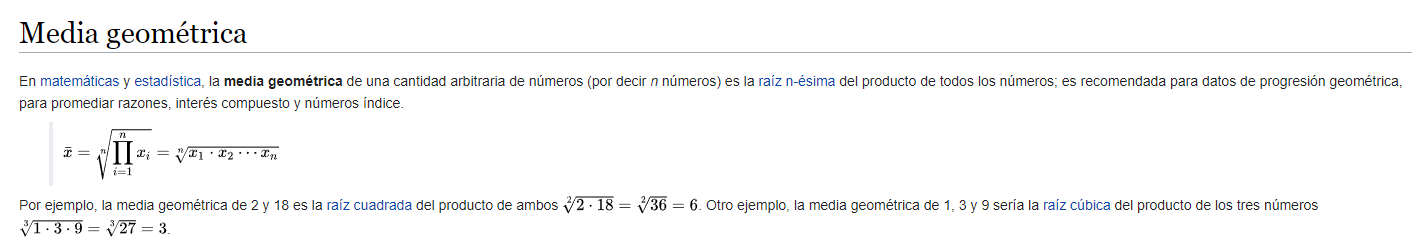


In [86]:
import math

elemProducte=1
for elem in mostraNbaDf['player_height']:
        elemProducte=elemProducte*elem

listsize=mostraNbaDf['player_height'].size

mitjanaGeo=(float)(math.pow(elemProducte,(1/listsize)))
print("La mitjana geometrica es : " + str(mitjanaGeo))

La mitjana geometrica es : inf


***El calcul del producte dels elements de la serie es massa gran***

***Explorem un metode alternatiu***

***If you are willing to use numpy, use np.exp(np.mean(np.log(R)))***

In [88]:
import numpy as np


In [89]:
mitjanaGeo=round(np.exp(np.mean(np.log(mostraNbaDf['player_height']))),2)

***Fem servir la funcio usada en l'exercici 1 per afegir la mitjana geometrica al diccionari***

In [90]:
statsHeightDict=varStatist(mostraNbaDf['player_height'])

In [91]:
# afegim la mitjana geometrica
statsHeightDict['Mitjana Geometrica']=mitjanaGeo
print("Les dades estadistiques el l'alçada  de la moistra de jugadors de la NBA son:\n")
print(statsHeightDict)

Les dades estadistiques el l'alçada  de la moistra de jugadors de la NBA son:

{'Mitja': 200.86, 'Mediana': 203.2, 'Moda': 205.74, 'Desv. Std: ': 9.09, 'Mitjana Geometrica': 200.65}


***Podem veure que la mitjana geometrica es molt propera a la Mitja***

* Alternativament podem fer servir la llibreria statistics->geometric_mean()

In [92]:
# Importem la llibreria statistics
import statistics as stats

In [93]:
print(round(stats.geometric_mean(mostraNbaDf['player_height']),2))

200.65


* Mitjana  armònica
***La serva formula es:***

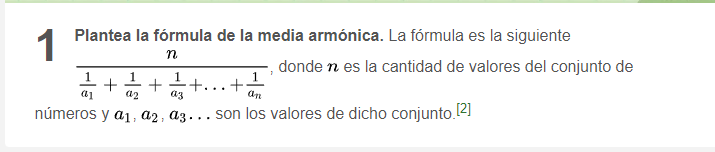


In [94]:
#definim una funciuó per calcular la mitjana harmònica
# se li pasa la llista i la recorrem per calcular la suma dels 1/xi
def mitjanaHarm(llista):
    elemProducte=0
    listsize=llista.size
    for elem in llista:
        elemProducte=elemProducte+(1/elem)
    
    mitjanaHarm=(listsize/elemProducte)
    
    return(mitjanaHarm)

In [95]:
print(round(mitjanaHarm(mostraNbaDf['player_height']),2))

200.44


In [96]:
statsHeightDict['Mitjana harmònica']=round(mitjanaHarm(mostraNbaDf['player_height']),2)

In [97]:
print("Les dades estadistiques el l'alçada  de la mostra de jugadors de la NBA son:\n")
print(statsHeightDict)

Les dades estadistiques el l'alçada  de la mostra de jugadors de la NBA son:

{'Mitja': 200.86, 'Mediana': 203.2, 'Moda': 205.74, 'Desv. Std: ': 9.09, 'Mitjana Geometrica': 200.65, 'Mitjana harmònica': 200.44}


* Alternativament podem fer servir la llibreria statistics->harmonic_mean()

In [98]:
print(round(stats.harmonic_mean(mostraNbaDf['player_height']),2))

200.44
